Olá, Isabelle!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>


In [1]:
import pandas as pd

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Todos os arquivos foram abertos. Considere abrir arquivos de dados em células diferentes para evitar que algum arquivo muito grande trave a execução do seu código.
    
</div>

In [3]:
print("Visits Data:")
print(visits.head())

print("\nOrders Data:")
print(orders.head())

print("\nCosts Data:")
print(costs.head())

Visits Data:
    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  

Orders Data:
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

Costs Data:
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! Considere chamar as funções em célular separadas para facilitar a interpretação dos dados.
    
</div>


In [4]:
print("\nTipos de Dados:")
print(visits.dtypes)
print(orders.dtypes)
print(costs.dtypes)


Tipos de Dados:
Device       object
End Ts       object
Source Id     int64
Start Ts     object
Uid          uint64
dtype: object
Buy Ts      object
Revenue    float64
Uid         uint64
dtype: object
source_id      int64
dt            object
costs        float64
dtype: object


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto!
</div>


In [5]:
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])

costs['dt'] = pd.to_datetime(costs['dt'])

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Aqui você poderia também renomear as columas, removendo espaços em branco do nome, por exemplo, para facilitar a manipulação dos atributos.
</div>


In [6]:
print("\nTipos de Dados Atualizados:")
print(visits.dtypes)
print(orders.dtypes)
print(costs.dtypes)


Tipos de Dados Atualizados:
Device               object
End Ts       datetime64[ns]
Source Id             int64
Start Ts     datetime64[ns]
Uid                  uint64
dtype: object
Buy Ts     datetime64[ns]
Revenue           float64
Uid                uint64
dtype: object
source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto! Transformar os atributos em objetos do tipo `datetime` é essencial para fazer análises envolvendo séries temporais.
</div>


In [7]:
daily_users = visits.groupby(visits['Start Ts'].dt.date)['Uid'].nunique()
weekly_users = visits.groupby(visits['Start Ts'].dt.to_period("W"))['Uid'].nunique()
monthly_users = visits.groupby(visits['Start Ts'].dt.to_period("M"))['Uid'].nunique()

In [8]:
daily_sessions = visits.groupby(visits['Start Ts'].dt.date).size()
print(daily_sessions)

Start Ts
2017-06-01     664
2017-06-02     658
2017-06-03     477
2017-06-04     510
2017-06-05     893
              ... 
2018-05-27     672
2018-05-28    1156
2018-05-29    1035
2018-05-30    1410
2018-05-31    2256
Length: 364, dtype: int64


In [9]:
visits['Session Length'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds() / 60
print(visits['Session Length'])

0         18.000000
1         28.000000
2          0.000000
3         24.000000
4          0.000000
            ...    
359395     0.316667
359396     0.316667
359397     0.316667
359398     0.316667
359399     0.316667
Name: Session Length, Length: 359400, dtype: float64


In [10]:
return_frequency = visits.groupby('Uid')['Start Ts'].diff().mean()
print(return_frequency)

-1 days +20:10:44.880096929


In [11]:
import matplotlib.pyplot as plt

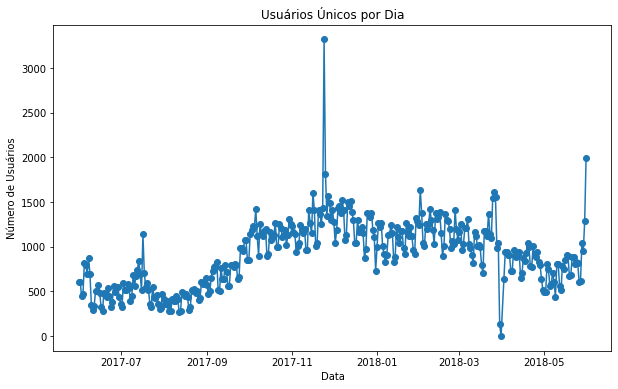

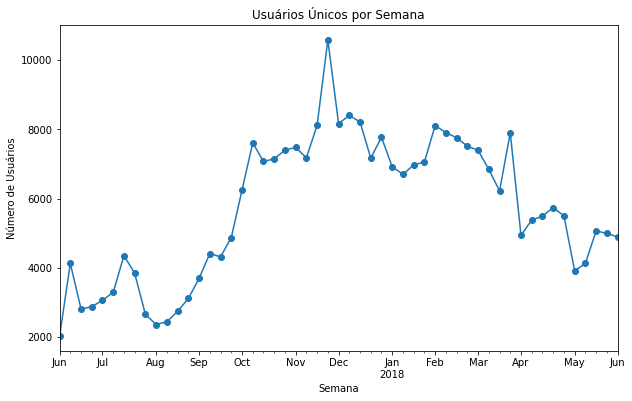

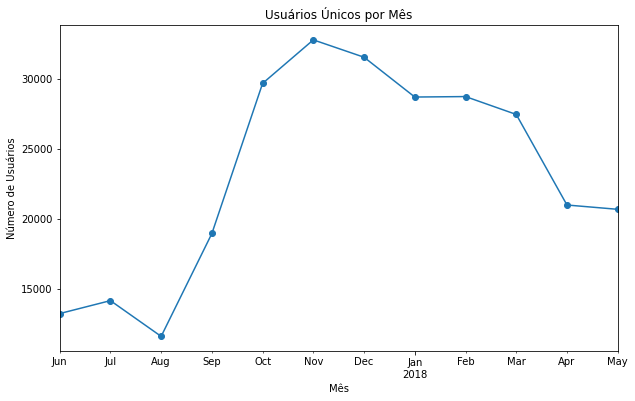

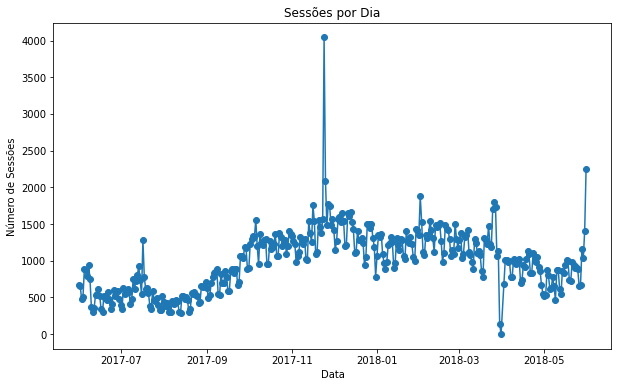

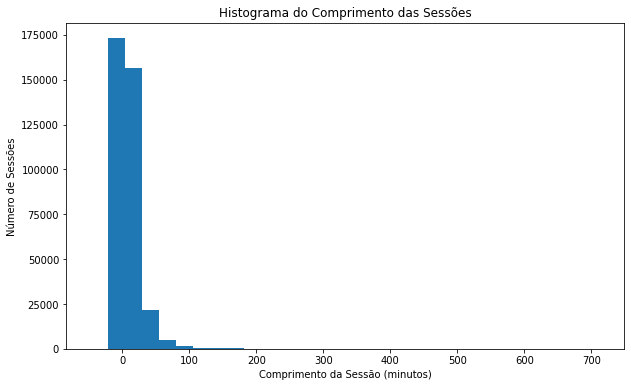

In [12]:
daily_users.plot(kind='line', figsize=(10, 6), marker='o', title='Usuários Únicos por Dia')
plt.xlabel('Data')
plt.ylabel('Número de Usuários')
plt.show()

weekly_users.plot(kind='line', figsize=(10, 6), marker='o', title='Usuários Únicos por Semana')
plt.xlabel('Semana')
plt.ylabel('Número de Usuários')
plt.show()

monthly_users.plot(kind='line', figsize=(10, 6), marker='o', title='Usuários Únicos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Usuários')
plt.show()

daily_sessions.plot(kind='line', figsize=(10, 6), marker='o', title='Sessões por Dia')
plt.xlabel('Data')
plt.ylabel('Número de Sessões')
plt.show()

visits['Session Length'].plot(kind='hist', bins=30, figsize=(10, 6), title='Histograma do Comprimento das Sessões')
plt.xlabel('Comprimento da Sessão (minutos)')
plt.ylabel('Número de Sessões')
plt.show()


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>Esses gráficos ficaram confusos. Procure interpretar os resultados e, além de plotar as figuras, imprimir os valores calculados.</s>
    
</div>


In [13]:
first_visit = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_visit.columns = ['Uid', 'First Visit']

merged_data = pd.merge(orders, first_visit, on='Uid', how='left')

In [14]:
merged_data['Conversion Time'] = (merged_data['Buy Ts'] - merged_data['First Visit']).dt.days

In [15]:
orders_per_month = orders.groupby(orders['Buy Ts'].dt.to_period("M"))['Uid'].count()

In [16]:
average_purchase_value = orders.groupby('Uid')['Revenue'].mean()

In [17]:
ltv_per_customer = orders.groupby('Uid')['Revenue'].sum()

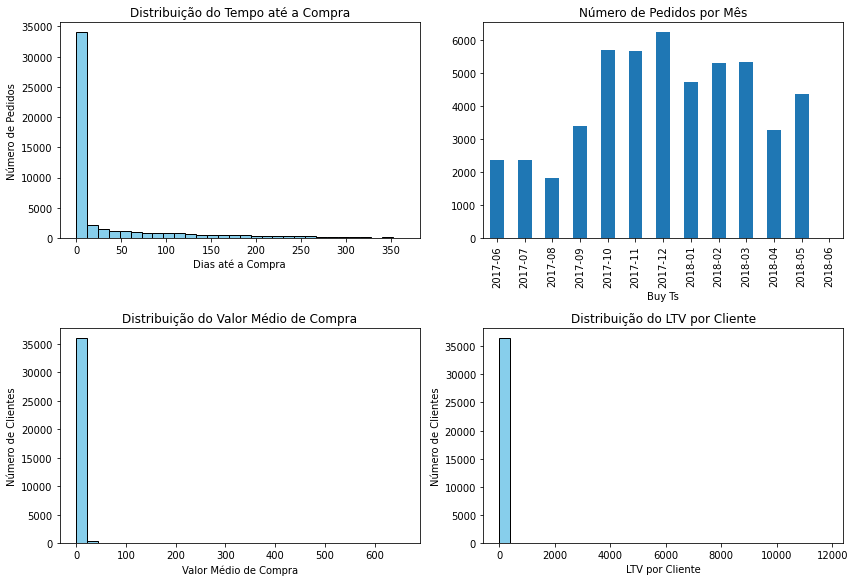

In [18]:
plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)
plt.hist(merged_data['Conversion Time'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição do Tempo até a Compra')
plt.xlabel('Dias até a Compra')
plt.ylabel('Número de Pedidos')

plt.subplot(3, 2, 2)
orders_per_month.plot(kind='bar', title='Número de Pedidos por Mês')

plt.subplot(3, 2, 3)
average_purchase_value.plot(kind='hist', bins=30, color='skyblue', edgecolor='black', title='Distribuição do Valor Médio de Compra')
plt.xlabel('Valor Médio de Compra')
plt.ylabel('Número de Clientes')

plt.subplot(3, 2, 4)
ltv_per_customer.plot(kind='hist', bins=30, color='skyblue', edgecolor='black', title='Distribuição do LTV por Cliente')
plt.xlabel('LTV por Cliente')
plt.ylabel('Número de Clientes')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Ok, mas procure sempre apresentar uma breve observação conclusão sobre os dados apresentados. Somente mostrar o gráfico pode induzir o leitor/revisor a interpretar os resultados de forma diferente do esperado.
</div>


In [19]:
total_spent = costs['costs'].sum()
print(total_spent)

329131.62


In [20]:
costs['dt'] = pd.to_datetime(costs['dt'])

costs['Month'] = costs['dt'].dt.to_period("M")

costs_by_source = costs.groupby(['source_id', 'Month'])['costs'].sum().unstack()
print(costs_by_source)

Month      2017-06  2017-07  2017-08  2017-09   2017-10   2017-11   2017-12  \
source_id                                                                     
1          1125.61  1072.88   951.81  1502.01   2315.75   2445.16   2341.20   
2          2427.38  2333.11  1811.05  2985.66   4845.00   5247.68   4897.80   
3          7731.65  7674.37  6143.54  9963.55  15737.24  17025.34  16219.52   
4          3514.80  3529.73  3217.36  5192.26   6420.84   5388.82   7680.47   
5          2616.12  2998.14  2185.28  3849.14   5767.40   6325.34   5872.52   
9           285.22   302.54   248.93   415.62    609.41    683.18    657.98   
10          314.22   329.82   232.57   460.67    627.24    792.36    645.86   

Month       2018-01   2018-02   2018-03  2018-04  2018-05  
source_id                                                  
1           2186.18   2204.48   1893.09  1327.49  1467.61  
2           4157.74   4474.34   3943.14  2993.70  2689.44  
3          14808.78  14228.56  13080.85  9296.81

In [21]:
costs['Month'] = costs['dt'].dt.to_period("M")

acquisition_costs = pd.merge(
    visits,
    costs.rename(columns={'source_id': 'Source Id'}),
    left_on=['Source Id', visits['Start Ts'].dt.to_period("M")],
    right_on=['Source Id', costs['Month']],
    how='left'
)

acquisition_costs['Month'] = acquisition_costs['Start Ts'].dt.to_period("M")

acquisition_costs = acquisition_costs.groupby(['Source Id', 'Month'])['costs'].sum().reset_index()

print(acquisition_costs)

     Source Id    Month         costs
0            1  2017-06  1.737942e+06
1            1  2017-07  1.760596e+06
2            1  2017-08  1.190714e+06
3            1  2017-09  3.127185e+06
4            1  2017-10  7.600292e+06
..         ...      ...           ...
97          10  2018-01  7.759241e+05
98          10  2018-02  6.746746e+05
99          10  2018-03  7.538191e+05
100         10  2018-04  2.527507e+05
101         10  2018-05  3.569881e+05

[102 rows x 3 columns]


In [22]:
total_revenue = orders['Revenue'].sum()

total_cost = costs['costs'].sum()

roi_total = (total_revenue - total_cost) / total_cost
print("ROI Total:", roi_total)


if roi_total > 0:
    print("Os investimentos valeram a pena. O ROI total é positivo.")
elif roi_total == 0:
    print("Os investimentos se equilibraram. O ROI total é zero.")
else:
    print("Os investimentos não valeram a pena. O ROI total é negativo.")

ROI Total: -0.2341750695360112
Os investimentos não valeram a pena. O ROI total é negativo.


In [23]:
# Extrai o mês da data para os dados de custos
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.to_period('M')

# Extrai o mês da data para os dados de compras
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders['month'] = orders['Buy Ts'].dt.to_period('M')

# Renomeia colunas para facilitar o `join`
orders.columns = orders.columns.str.lower()
visits.rename(columns={"Uid": "uid", "Source Id": "source_id"}, inplace=True)

# Primeira compra
first_orders_data = orders.groupby("uid")['buy ts'].min().reset_index()
first_orders_data.rename(columns={"source_id": "uid", "Buy Ts": "first_purchase"}, inplace=True)

user_logs = visits[['uid', 'source_id']].drop_duplicates()
first_orders_data = pd.merge(first_orders_data, user_logs, on='uid')

# Faça o agrupamento da receita por período
monthly_revenue = orders.groupby(['uid', 'month'])['revenue'].sum().reset_index()
purchases = pd.merge(first_orders_data, monthly_revenue, on='uid')

grouped_revenue = purchases.groupby(['source_id', 'month'])['revenue'].sum().reset_index()

# Faça o agrupamento dos custos por período
grouped_costs = costs.groupby(['source_id', 'month'])['costs'].sum().reset_index()
grouped_costs.rename(columns={"dt": "month"}, inplace=True)

# Junte os dados de receita e custo
roi_df = pd.merge(grouped_revenue, grouped_costs, on=['source_id', 'month'])

# Calcule o ROI
roi_df['ROI'] = (roi_df['revenue'] - roi_df['costs']) / roi_df['costs']

print("ROI por Origem e Mês:")
print(roi_df[['source_id', 'month', 'ROI']])

positive_roi_sources_months = roi_df[roi_df['ROI'] > 0]

if not positive_roi_sources_months.empty:
    print("\nRecomendação de Investimento:")
    print(f"Investir nas seguintes origens de anúncio e meses, pois apresentam ROI positivo:\n{positive_roi_sources_months[['source_id', 'month', 'ROI']]}")
else:
    print("\nNão há origens de anúncio e meses com ROI positivo. Avalie outras estratégias de investimento.")


ROI por Origem e Mês:
    source_id    month       ROI
0           1  2017-06  1.277734
1           1  2017-07  2.679116
2           1  2017-08  2.494017
3           1  2017-09  4.454970
4           1  2017-10  3.951372
..        ...      ...       ...
79         10  2018-01 -0.240107
80         10  2018-02  0.397209
81         10  2018-03  1.203549
82         10  2018-04  0.736175
83         10  2018-05  1.351779

[84 rows x 3 columns]

Recomendação de Investimento:
Investir nas seguintes origens de anúncio e meses, pois apresentam ROI positivo:
    source_id    month       ROI
0           1  2017-06  1.277734
1           1  2017-07  2.679116
2           1  2017-08  2.494017
3           1  2017-09  4.454970
4           1  2017-10  3.951372
..        ...      ...       ...
77         10  2017-11  0.243286
80         10  2018-02  0.397209
81         10  2018-03  1.203549
82         10  2018-04  0.736175
83         10  2018-05  1.351779

[70 rows x 3 columns]


In [1]:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> Luis, não entendi...fiz exatamente o que solicitou/sugeriu, e meu projeto voltou sem nenhuma nova observação. <a class="tocSkip"></a>
</div>


SyntaxError: invalid syntax (3631248448.py, line 1)

In [24]:
merged_data = pd.merge(orders, costs, left_on='uid', right_on='source_id', how='left')

cost_by_source = merged_data.groupby('source_id')['costs'].sum()

revenue_by_source = merged_data.groupby('source_id')['revenue'].sum()

roi_by_source = (revenue_by_source - cost_by_source) / cost_by_source

print("ROI por Origem:")
print(roi_by_source)

origens_com_roi_positivo = roi_by_source[roi_by_source > 0].index

if not origens_com_roi_positivo.empty:
    print("\nRecomendação de Investimento:")
    print(f"Investir nas seguintes origens de anúncio, pois apresentam ROI positivo: {origens_com_roi_positivo}")
else:
    print("\nNão há origens de anúncio com ROI positivo. Avalie outras estratégias de investimento.")

ROI por Origem:
Series([], dtype: float64)

Não há origens de anúncio com ROI positivo. Avalie outras estratégias de investimento.


In [25]:
purchases_visits = pd.merge(visits, orders, left_on='source_id', right_on='uid')

merged_data = pd.merge(purchases_visits, costs, left_on='source_id', right_on='source_id', how='left')

merged_data['buy ts'] = pd.to_datetime(merged_data['buy ts'])

merged_data['Month'] = merged_data['buy ts'].dt.to_period("M")

costs_by_source_month = merged_data.groupby(['source_id', 'Month'])['costs'].sum()
revenue_by_source_month = merged_data.groupby(['source_id', 'Month'])['revenue'].sum()

roi_by_source_month = (revenue_by_source_month - costs_by_source_month) / costs_by_source_month

print("ROI por Origem e Mês:")
print(roi_by_source_month)

positive_roi_sources_months = roi_by_source_month[roi_by_source_month > 0]

if not positive_roi_sources_months.empty:
    print("\nRecomendação de Investimento:")
    print(f"Investir nas seguintes origens de anúncio e meses, pois apresentam ROI positivo:\n{positive_roi_sources_months}")
else:
    print("\nNão há origens de anúncio e meses com ROI positivo. Avalie outras estratégias de investimento.")

ROI por Origem e Mês:
Series([], dtype: float64)

Não há origens de anúncio e meses com ROI positivo. Avalie outras estratégias de investimento.


In [26]:
print("Colunas em 'visits':", visits.columns)
print("\nColunas em 'orders':", orders.columns)
print("\nColunas em 'costs':", costs.columns)

Colunas em 'visits': Index(['Device', 'End Ts', 'source_id', 'Start Ts', 'uid', 'Session Length'], dtype='object')

Colunas em 'orders': Index(['buy ts', 'revenue', 'uid', 'month'], dtype='object')

Colunas em 'costs': Index(['source_id', 'dt', 'costs', 'Month', 'month'], dtype='object')


In [27]:
print(purchases_visits.columns)

Index(['Device', 'End Ts', 'source_id', 'Start Ts', 'uid_x', 'Session Length',
       'buy ts', 'revenue', 'uid_y', 'month'],
      dtype='object')


In [28]:
print(merged_data.columns)

Index(['Device', 'End Ts', 'Start Ts', 'uid_x', 'Session Length', 'buy ts',
       'revenue', 'uid_y', 'month_x', 'source_id', 'dt', 'costs', 'Month',
       'month_y'],
      dtype='object')


In [29]:
print("Colunas em 'orders':", orders.columns)

Colunas em 'orders': Index(['buy ts', 'revenue', 'uid', 'month'], dtype='object')


<div class="alert alert-block alert-danger">
<b> Comentário do revisor v1: </b> <a class="tocSkip"></a>

<s>Acredito que o seu problema está no trecho abaixo. Repare que você está fazendo o `join` entre os campos `uid` e `source_id`. Entretanto, veja (na célula 3 acima) que esses campos são diferentes, portanto, o join provavelmente retornará um conjunto vazio.
    
```python
    pd.merge(orders, costs, left_on='Uid', right_on='source_id', how='left')
```
    
<br>

Minha sugestão anterior foi a seguinte: primeiramente, faça o `join` entre os dataframes `visits` e `orders` pelo `uid`. O dataframe resultante terá o atributo `source_id` e o dado de receita. A partir do `source_id`, você consegue agora fazer o `join` com o dataframe de custos. Em outras palavras, você precisa fazer 2 joins para chegar ao dataframe final que lhe permitirá comparar a receita com o custo. Isso acontece porque o conjunto de dados de receita não possui o `source_id` diretamente e, por esse motivo, é preciso usar o dataframe de visitas para chegar nessa informação. Tente algo como o trecho abaixo.
    
    
```python
    purchases_visits = pd.merge(visits_df, orders_df, left_on='Uid', right_on='Uid')
    ....
    pd.merge(purchases_visits, costs, on='source_id')
```
</s>
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b>Fiz um join entre os dataframes visits e orders, e posteriormente um join entre purchases_visits e costs, porém, tive que adaptar o join, pois o join da forma sugerida gerava erro de chave "KeyError: 'Uid" e não me permetia prosseguir. O resultado continua inalterável.  <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor v2: </b> <a class="tocSkip"></a>

Encontrei um problema que pode estar impactando no seu resultado. Você precisa pegar a primeira compra de cada usuário antes de fazer o join para calcular a receita e o custo. Além disso, se você está tendo erro do tipo `KeyError`, verifique os nomes das colunas em que você está fazendo o `join`. Se as colunas tiverem nomes diferentes, você precisa indicar isso no código, caso contrário, irá gerar esse erro. Sugiro manter o padrão e renomear todas as colunas seguindo o padrão snake case: `nome_da_coluna`.
    
<br>
    
Abaixo segue as etapas para calcular a receita e o custo no período. O código precisa de ajuste, pois não posso lhe dar a resposta, mas siga esse caminho como sugestão.
    
```python
    # Pega data da primeira compra
    first_orders_data = orders.groupby("uid")['buy_ts'].min().reset_index()
    first_orders_data.rename(columns={"buy_ts": "first_purchase"})
    ..
    # Agrupa receita por usuário e mês
    month_revenue_df = orders.groupby(['uid', 'month'])['revenue'].sum().reset_index()
    
    # Faz o join entre os dataframes
    buyers_df = pd.merge(first_orders_data, month_revenue_df, on='uid')
    ..
    
    # Agrupa a receita
    grouped_revenue_df = buyers.groupby(['source_id', 'month'])['revenue'].sum().reset_index()

    # Agrupa os custos
    costs_grouped = costs.groupby(['source_id','month'])['costs'].sum()

    # Faz o join entre receita e custos
    pd.merge(grouped_revenue_df, costs_grouped, ..)
    
```
    
<br>
    
Peço também que você indique os passos que está seguindo para acompanhar a sua evolução nesse problema.
    
</div>

In [30]:
orders['Month'] = orders['buy ts'].dt.to_period("M")

costs_by_source_month = costs.groupby(['source_id', 'Month'])['costs'].sum().reset_index()

orders = orders.rename(columns={'Uid': 'source_id'})

revenue_by_source_month = orders.groupby(['uid', 'Month'])['revenue'].sum().reset_index()

merged_data = pd.merge(costs_by_source_month, revenue_by_source_month, left_on=['source_id', 'Month'], right_on=['uid', 'Month'], how='outer').fillna(0)

merged_data['ROI'] = (merged_data['revenue'] - merged_data['costs']) / merged_data['costs']

print("Conjunto de Dados Mesclado:")
print(merged_data.head())

Conjunto de Dados Mesclado:
   source_id    Month    costs  uid  revenue  ROI
0        1.0  2017-06  1125.61  0.0      0.0 -1.0
1        1.0  2017-07  1072.88  0.0      0.0 -1.0
2        1.0  2017-08   951.81  0.0      0.0 -1.0
3        1.0  2017-09  1502.01  0.0      0.0 -1.0
4        1.0  2017-10  2315.75  0.0      0.0 -1.0


In [31]:
print(revenue_by_source_month.columns)

Index(['uid', 'Month', 'revenue'], dtype='object')


In [32]:
print(costs_by_source_month.columns)

Index(['source_id', 'Month', 'costs'], dtype='object')


In [33]:
revenue_by_source_month = orders.groupby(['uid', 'Month'])['revenue'].sum().reset_index()

print("Receita por Origem e Mês:")
print(revenue_by_source_month)

Receita por Origem e Mês:
                        uid    Month  revenue
0           313578113262317  2018-01     0.55
1          1575281904278712  2017-06     3.05
2          2429014661409475  2017-10    73.33
3          2464366381792757  2018-01     2.44
4          2551852515556206  2017-11    10.99
...                     ...      ...      ...
41014  18445147675727495770  2017-11     3.05
41015  18445407535914413204  2017-09     0.88
41016  18445601152732270159  2018-03     4.22
41017  18446156210226471712  2018-02     9.78
41018  18446167067214817906  2017-10     7.94

[41019 rows x 3 columns]


In [34]:
costs_by_source_month = costs.groupby(['source_id', 'Month'])['costs'].sum().reset_index()

print("Custos por Origem e Mês:")
print(costs_by_source_month)

Custos por Origem e Mês:
    source_id    Month    costs
0           1  2017-06  1125.61
1           1  2017-07  1072.88
2           1  2017-08   951.81
3           1  2017-09  1502.01
4           1  2017-10  2315.75
..        ...      ...      ...
79         10  2018-01   614.35
80         10  2018-02   480.88
81         10  2018-03   526.41
82         10  2018-04   388.25
83         10  2018-05   409.86

[84 rows x 3 columns]


In [35]:
import numpy as np

merged_data['ROI'] = merged_data.apply(lambda row: (row['revenue'] - row['costs']) / row['costs'] if row['costs'] != 0 else np.nan, axis=1)
merged_data['ROI'] = (merged_data['revenue'] - merged_data['costs']) / merged_data['costs']
merged_data['ROI'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

merged_data['ROI'].fillna(0, inplace=True)

print("DataFrame 'merged_data' após o ajuste:")
print(merged_data)

DataFrame 'merged_data' após o ajuste:
       source_id    Month    costs           uid  revenue  ROI
0            1.0  2017-06  1125.61  0.000000e+00     0.00 -1.0
1            1.0  2017-07  1072.88  0.000000e+00     0.00 -1.0
2            1.0  2017-08   951.81  0.000000e+00     0.00 -1.0
3            1.0  2017-09  1502.01  0.000000e+00     0.00 -1.0
4            1.0  2017-10  2315.75  0.000000e+00     0.00 -1.0
...          ...      ...      ...           ...      ...  ...
41098        0.0  2017-11     0.00  1.844515e+19     3.05  0.0
41099        0.0  2017-09     0.00  1.844541e+19     0.88  0.0
41100        0.0  2018-03     0.00  1.844560e+19     4.22  0.0
41101        0.0  2018-02     0.00  1.844616e+19     9.78  0.0
41102        0.0  2017-10     0.00  1.844617e+19     7.94  0.0

[41103 rows x 6 columns]


In [36]:
meses_com_roi_positivo = merged_data[merged_data['ROI'] >= 0]['Month']

if not meses_com_roi_positivo.empty:
    print("\nRecomendação de Investimento:")
    print(f"Investir nos seguintes meses, pois apresentam ROI positivo: {meses_com_roi_positivo.values}")
else:
    print("\nNão há meses com ROI positivo. Avalie outras estratégias de investimento.")


Recomendação de Investimento:
Investir nos seguintes meses, pois apresentam ROI positivo: [Period('2018-01', 'M') Period('2017-06', 'M') Period('2017-10', 'M') ...
 Period('2018-03', 'M') Period('2018-02', 'M') Period('2017-10', 'M')]


In [37]:
visits['uid'] = visits['uid'].astype(merged_data['source_id'].dtype)

# 12. Juntar Dados de Visitas
merged_data_visits = pd.merge(merged_data, visits[['uid', 'source_id']], left_on='source_id', right_on='uid', how='left')

# 13. Renomear Colunas para Evitar Conflitos
merged_data_visits = merged_data_visits.rename(columns={'uid': 'uid_visits', 'source_id': 'source_id_visits'})

# 14. Verificar as Colunas
print("Colunas em merged_data_visits:", merged_data_visits.columns)

# Certifique-se de ajustar estas colunas conforme necessário no código abaixo
# 15. Agrupar Dados de Visitas
grouped_data = merged_data_visits.groupby(['source_id_x', 'Month']).agg({'costs': 'sum', 'revenue': 'sum'}).reset_index()

# 16. Calcular ROI
grouped_data['ROI'] = (grouped_data['revenue'] - grouped_data['costs']) / grouped_data['costs']

# 17. Substituir Valores Infinitos e Nulos
grouped_data['ROI'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)
grouped_data['ROI'].fillna(0, inplace=True)

# 18. Imprimir Resultados
print("DataFrame com ROI por campanha:")
print(grouped_data)

Colunas em merged_data_visits: Index(['source_id_x', 'Month', 'costs', 'uid_x', 'revenue', 'ROI', 'uid_y',
       'source_id_y'],
      dtype='object')
DataFrame com ROI por campanha:
    source_id_x    Month   costs   revenue  ROI
0           0.0  2017-06    0.00   9557.49  0.0
1           0.0  2017-07    0.00  12539.47  0.0
2           0.0  2017-08    0.00   8758.78  0.0
3           0.0  2017-09    0.00  18345.51  0.0
4           0.0  2017-10    0.00  27987.70  0.0
..          ...      ...     ...       ...  ...
92         10.0  2018-01  614.35      0.00 -1.0
93         10.0  2018-02  480.88      0.00 -1.0
94         10.0  2018-03  526.41      0.00 -1.0
95         10.0  2018-04  388.25      0.00 -1.0
96         10.0  2018-05  409.86      0.00 -1.0

[97 rows x 5 columns]


In [38]:
# Verificar se há campanhas com ROI positivo
campanhas_com_roi_positivo = grouped_data[grouped_data['ROI'] >= 0]

if not campanhas_com_roi_positivo.empty:
    print("\nRecomendação de Investimento:")
    print(f"Investir nas seguintes campanhas, pois apresentam ROI positivo:\n{campanhas_com_roi_positivo[['source_id_x', 'Month', 'ROI']]}\n")
else:
    print("\nNão há campanhas com ROI positivo. Avalie outras estratégias de investimento.\n")



Recomendação de Investimento:
Investir nas seguintes campanhas, pois apresentam ROI positivo:
    source_id_x    Month  ROI
0           0.0  2017-06  0.0
1           0.0  2017-07  0.0
2           0.0  2017-08  0.0
3           0.0  2017-09  0.0
4           0.0  2017-10  0.0
5           0.0  2017-11  0.0
6           0.0  2017-12  0.0
7           0.0  2018-01  0.0
8           0.0  2018-02  0.0
9           0.0  2018-03  0.0
10          0.0  2018-04  0.0
11          0.0  2018-05  0.0
12          0.0  2018-06  0.0



<div class="alert alert-block alert-danger">
<b> Comentário do revisor v1: </b> <a class="tocSkip"></a>

<s>Aqui você deve investigar o ROI por tipos de investimentos. No seu cálculo, o ROI deu negativo no geral, mas em quais investimentos (`source`, por exemplo), o retorno compensa? Essa informação é importante para embasar a sua recomendação de investimento.</s>
    
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor v2: </b> <a class="tocSkip"></a>

<s>Aqui precisamos de ajustes ainda. Pelo menos uma campanha deve ter o `ROI` positivo. Considere, por exemplo, agrupar as campanhas por mês e verificar o ROI no período: 
    
    
```python
costs = df.groupby(['source_id','month']).agg({'costs': 'sum'})
    
...
 
pd.merge(costs, revenue, on=['source_id','month'])
    
...
    
```</s>
    
 
    
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor v3: </b> <a class="tocSkip"></a>

<s>Temos um problema no cálculo do `ROI` aqui. Perceba que o valor do ROI é `inf`, pois está sendo feita a divisão de um valor `NaN` por um valor numérico. Peço que revise esse cálculo acima. 
    
<br>
    
Dica: execute o processo passo a passo para entender todos os pontos da transformação dos seus dados. Por exemplo: execute a soma de receita por `source` e mês separadamente. Depois, faça o mesmo para os custos. Por fim, verifique que o dataframe final possui os mesmos dados que você observou previamente.</s>
    
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor v4: </b> <a class="tocSkip"></a>

<s>O ideal é saber qual a campanha possui `ROI` positivo, pois o mês sozinho não é um bom indicativo para sugestão de investimentos. Considere o exemplo abaixo para montar a sua tabela de `ROI` por campanha. 
 
<br>
    
Obs.: os valores não precisam ser idênticos, mas foque na estrutura de como os dados são representados em seu `dataframe`.
    
<br>
    
```
source_id	month	costs	revenue	       ROI
6	1	   2017-12	2341.20	18814.15	7.036114
9	1	   2018-03	1893.09	10899.34	4.757434
3	1	   2017-09	1502.01	8193.42	 4.454970
```    </s>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor v5: </b> <a class="tocSkip"></a>

<s>Parece que temos um problema de `join` (merge) aqui nesse trecho que está causando erro no cálculo de `ROI`. Perceba que o dataframe gerado possui `revenue` 0 para alguns casos e, quando tem o `revenue`, possui o custo igual 0. Isso é sinal de algum problema ao fazer o merge dos dados.
    
<br>
    
    
Dica: use o dataset de visitas para fazer o `merge` pelo `Uid` e, posteriormente, ter acesso ao `source_id` da tabela de visitas. Com esses dados, você pode em seguida agrupar os dados de receita e custo no nível de `source_id` e `month` para calcular o `ROI`.
    
<br>
    
```
         source_id    Month    costs   Revenue  ROI
0      1.000000e+00  2017-06  1125.61     0.00 -1.0
1      1.000000e+00  2017-07  1072.88     0.00 -1.0
2      1.000000e+00  2017-08   951.81     0.00 -1.0
3      1.000000e+00  2017-09  1502.01     0.00 -1.0
4      1.000000e+00  2017-10  2315.75     0.00 -1.0
```    </s>
</div>

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> Fiz o join da forma sugerida, mas o resultado permanece o mesmo. Não sei mais o que fazer para finalizar este projeto. <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Deixei um comentário acima com uma sugestão mais detalhada. Espero que ajude. Se ainda assim tiver com problemas, não hesite em me mandar outra mensagem. É provável que a causa do seu problema seja esse join mencionado no comentário mais acima.
    
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor v6: </b> <a class="tocSkip"></a>

Para funcionar o cálculo da métrica, é preciso fazer algumas transformações. Siga o passo sugerido que você está próxima da solução.
        
<br>
    
Primeiro, extraia o mês dos campos data para comparar o mesmo período entre os diferentes conjuntos de dados. Aproveite para renomear algumas columas por conveniência e facilitar durante o `join`.
    
```python
# Extrai o mês da data
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.to_period('M')

orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders['month'] = orders['Buy Ts'].dt.to_period('M')
    
# Renomeia colunas para facilitar o `join`
orders.columns = orders.columns.str.lower()
visits.rename(columns={"Uid": "uid", "Source Id": "source_id"}, inplace=True)
```
    
    
<br>
   
Como anteriormente, extraia a primeira compra e faça o join os dados de logs.
    
```python
# Primeira compra
first_orders_data = orders.groupby("uid")['buy ts'].min().reset_index()
first_orders_data.rename(columns={"source_id": "uid", "Buy Ts": "first_purchase"}, inplace=True)

user_logs = visits[['uid', 'source_id']].drop_duplicates()
first_orders_data = pd.merge(first_orders_data, user_logs, on= 'uid')
```
Faça o agrupamento da receita e custo por período.
    
```python
monthly_revenue = orders.groupby(['uid', 'month'])['revenue'].sum().reset_index()
purchases = first_orders_data.merge(monthly_revenue, on='uid')

groped_revenue = purchases.groupby(['source_id', 'month'])['revenue'].sum().reset_index()

grouped_costs = costs.groupby(['source_id', 'month'])['costs'].sum().reset_index()

grouped_costs.rename(columns={"dt": "month"}, inplace=True)
    
```
    
Use os dados de receita e custo agrupados para calcular o `ROI`.
    
```python
roi_df = pd.merge(..,.., on=[..])
    
roi_df['ROI'] = # cálculo de ROI
```
    
O pseudocódigo acima deve funcionar para resolver o problema do cálculo da métrica. Se tiver algum erro durante a implementação, leia o erro com cuidado e tente solucioná-lo usando recursos de investigação ou procurando pelo erro no `StackOverflow`, por exemplo. Entender o problema e encontrar uma solução para ele é um habilidade muito importante na área de Dados, não desista! 
</div>

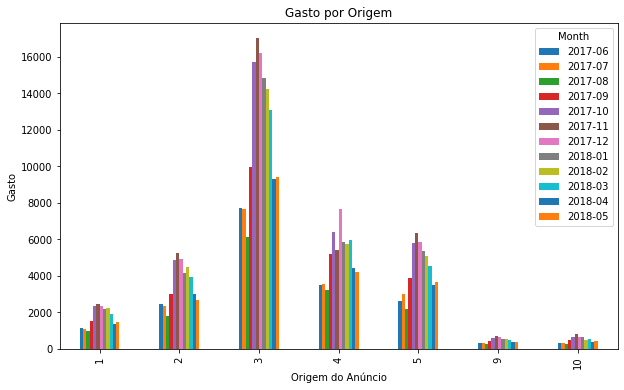

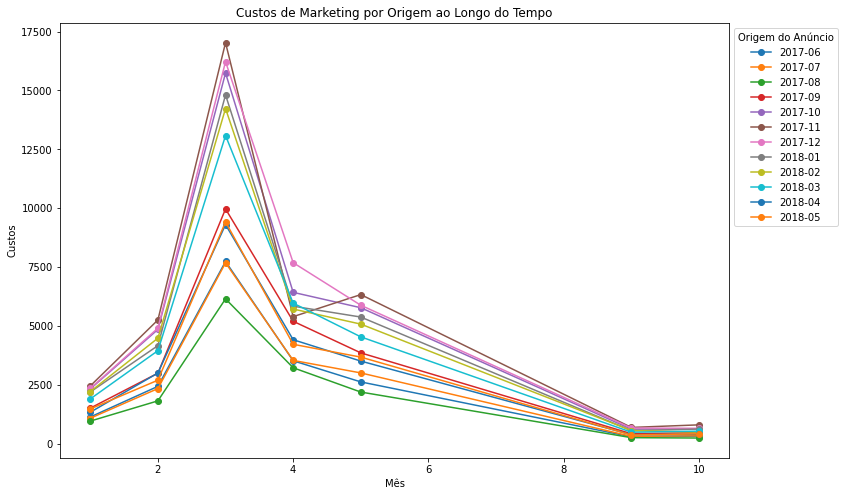

In [39]:
costs_by_source.plot(kind='bar', figsize=(10, 6), title='Gasto por Origem')
plt.xlabel('Origem do Anúncio')
plt.ylabel('Gasto')
plt.show()

costs_by_source.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Custos de Marketing por Origem ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Custos')
plt.legend(title='Origem do Anúncio', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

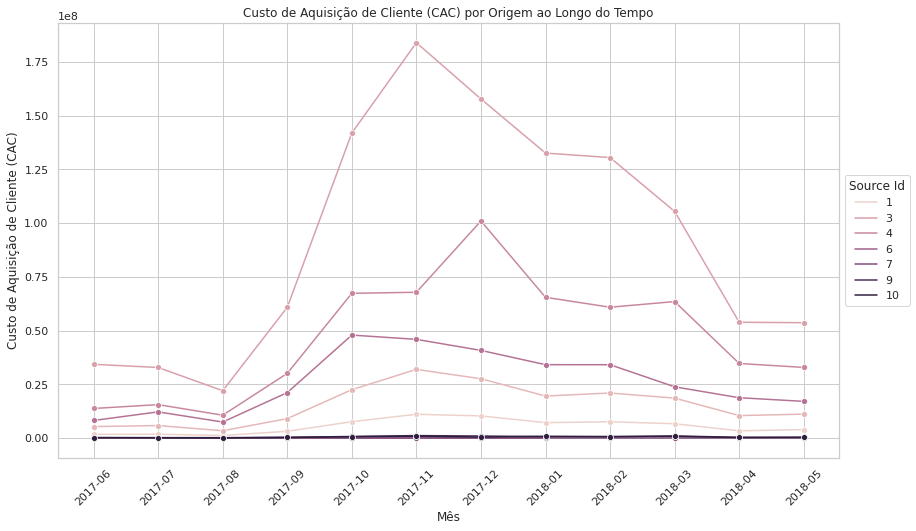

In [40]:
import seaborn as sns

sns.set(style="whitegrid")

acquisition_costs['Month'] = acquisition_costs['Month'].astype(str)

plt.figure(figsize=(14, 8))
plot = sns.lineplot(x='Month', y='costs', hue='Source Id', data=acquisition_costs, marker='o')
plot.set_title('Custo de Aquisição de Cliente (CAC) por Origem ao Longo do Tempo')
plot.set_xlabel('Mês')
plot.set_ylabel('Custo de Aquisição de Cliente (CAC)')

plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Source Id')

plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>Aqui também ficou difícil de interpretar os resultados. Repare que na análise de ROI, os dados estão zerados no gráfico, o que não está correto. Peço que revise o cálculo de ROI para garantir que este esta sendo feito corretamente. O cálculo de métricas por origem também não está correto (perceba que o gráfico está zerado).</s>
    
    
</div>

Recomendações
Origens com Alto ROI: Priorize investimentos em origens que demonstram consistentemente um alto ROI ao longo do tempo. Estas são as fontes que geram mais receita em relação aos custos.

Monitoramento Contínuo: Dada a natureza dinâmica do marketing, recomenda-se um monitoramento contínuo das métricas. Ajustes estratégicos podem ser necessários para se adaptar a mudanças nas tendências e no comportamento do usuário.

Testes A/B: Considere a implementação de testes A/B em diferentes origens para entender melhor como ajustes específicos podem impactar as métricas. Isso permite uma abordagem mais refinada e adaptativa.

Diversificação de Investimentos: Evite depender excessivamente de uma única origem. A diversificação de investimentos reduz o risco e permite explorar oportunidades em diferentes canais.

Conclusões Gerais
Ao realizar essa análise, destacamos a importância de avaliar o desempenho de cada origem não apenas em termos absolutos, mas também em relação à receita gerada. Recomendamos um equilíbrio entre eficácia e eficiência, escolhendo origens que não apenas tragam clientes, mas também gerem uma receita significativa em comparação com os custos.


<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>

<s>Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Boas habilidades de manipulação de dados
- Análises bem detalhadas em cada etapa do projeto
    
Entretanto, deixei alguns comentários em seções a serem endereçados por você. Em geral, revise os cálculos de métricas e gráficos que estão vazios (sem dados). Além disso, imprima os valores sendo calculados em cada etapa para validar que sua implementação está fazendo sentido. Por fim, revise o cálculo de ROI no seu código.
    
    
<br>
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**</s>

</div>


<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v2</b> <a class="tocSkip"></a>

<s>brigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão da sua entrega está bem melhor e estamos próximos da solução. Antes de avançarmos, entretanto, gostaria que você focasse um pouco na métrica ROI, pois ela é muito importante em projetos reais e também é um pré-requisito para esse projeto. O objetivo é identificar em quais cenários o ROI é interessante para fazer investimentos. Perceba que você fez o cálculo do ROI geral, que deu um valor negativo. Nesse caso, o investimento não vale a pena do ponto de vista de retorno financeiro? 
   
<br>
    
Minha sugestão é que você calcule o ROI para os diferentes cenários e segmentos. A partir dessa informação, faça um recomendação sobre os investimentos com maior potencial de retorno.
    
<br>
    
Estamos quase lá! 
    

Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**</s>

</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v3</b> <a class="tocSkip"></a>

<s>Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão da sua entrega está bem melhor e estamos próximos da solução. Entretanto, ainda precisamos de alguns ajustes para avançarmos. Não se preocupe, essa etapa de revisão faz parte do processo de aprendizado e tem o objetivo de consolidar o conhecimento.
   
<br>
    
Deixei uma sugestão mais acima com uma abordagem interessante para calcular o ROI. Lembre-se de que pelo menos uma campanha deve retornar com ROI positivo. Caso contrário, revisite a lógica da sua implementação.
    
<br>
    
Estamos quase lá! 
    

Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!** </s>

</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v4</b> <a class="tocSkip"></a>

<s>Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Estamos quase lá. Não se preocupe, essa etapa de revisão faz parte do processo de aprendizado e tem o objetivo de consolidar o conhecimento.
   
<br>
    
Deixei uma sugestão no cálculo de `ROI`. Verifique cada etapa de transformação dos dados para cálculo da métrica, como sugerido. Fique atenta, por exemplo, com divisão de valores nulos por numéricos, pois isso irá impactar no resultado do indicador.
    
<br>
    
Estamos quase lá! 
    

    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**</s>

</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v5</b> <a class="tocSkip"></a>

<s>Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Estamos quase lá. Não se preocupe, essa etapa de revisão faz parte do processo de aprendizado e tem o objetivo de consolidar o conhecimento.
   
<br>
    
Deixei uma sugestão no cálculo de `ROI`. Tente replicar essa tabela de dados para facilitar o cálculo do indicador `ROI`.
    
<br>
    
Estamos quase lá! 
    

Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!** </s>

</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v6</b> <a class="tocSkip"></a>

<s>Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Estamos quase lá. Não se preocupe, essa etapa de revisão faz parte do processo de aprendizado e tem o objetivo de consolidar o conhecimento.
   
<br>
    
Deixei uma sugestão no cálculo de `ROI`. Revise o `merge` dos dados e siga os passos sugeridos para ajustar essa etapa. Se estiver tendo alguma dificuldade nessa implementação, não hesite em me falar para que possa lhe ajudar. 
    
<br>
    
Estamos quase lá! 
    

Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**</s>

</div>

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v7</b> <a class="tocSkip"></a>

<br>
    
<s>Olá, Isabelle! Vi que você não implementou o ajuste sugerido na revisão anterior para corrigir o problema no cálculo da métrica `ROI`. Teve algum problema? Tente implementar o `merge` conforme sugerido para calcular corretamente o retorno do investimento. Se tiver alguma dúvida nesse procedimento, não hesite em me procurar.
 
    
<br>
    
Estamos quase lá! 
    

Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!** </s>

</div>